# This Version of the Major Project is in status Alpha for prediction an COVID 19 status in Germany and Hamburg. Part of that project includes the Task of the Minor Project.

This version of the main project is in the development phase and is intended to illustrate the challenge behind understanding the implementation of an ML project. The mistakes are left in the JP Notebook so that the understanding of the work necessary for the implementation comes up. Here is the decision courage for the gap :-)

Developement of an prediction Model for Covid-19(Saras-Cov 2) in Germany with real data form the RKI.
The data is presenting the status of the situation in Germany till 11. Juli 2020.

In the case it will be shown how different models(Model = Allgrorihem + Data) for an prediction we will be give us the best solutions. 

In [176]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

Now I import the dataset of the COVID-19 realdata in an array. This is the first step. My variable for that is named DataSetCovid19Germany.

In [2]:
DataSetCovid19Germany = pd.read_csv("RKI_COVID19.csv")

Now we will check if the data is readle. If it is nessesary to clean.

In [3]:
DataSetCovid19Germany

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,17307479,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,1001,"11.07.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
1,17307480,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"11.07.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2,17307481,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"11.07.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
3,17307482,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/21 00:00:00,1001,"11.07.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
4,17307483,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/27 00:00:00,1001,"11.07.2020, 00:00 Uhr",0,-9,2020/03/22 00:00:00,0,1,1,Nicht übermittelt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160087,17467566,16,Thüringen,LK Altenburger Land,A80+,M,1,0,2020/06/09 00:00:00,16077,"11.07.2020, 00:00 Uhr",0,-9,2020/05/19 00:00:00,0,1,1,Nicht übermittelt
160088,17467567,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2020/05/06 00:00:00,16077,"11.07.2020, 00:00 Uhr",0,-9,2020/05/04 00:00:00,0,1,1,Nicht übermittelt
160089,17467568,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2020/05/11 00:00:00,16077,"11.07.2020, 00:00 Uhr",0,-9,2020/05/01 00:00:00,0,1,1,Nicht übermittelt
160090,17467569,16,Thüringen,LK Altenburger Land,A80+,W,2,0,2020/05/28 00:00:00,16077,"11.07.2020, 00:00 Uhr",0,-9,2020/05/28 00:00:00,0,2,0,Nicht übermittelt


In [4]:
type(DataSetCovid19Germany)

pandas.core.frame.DataFrame

In [25]:
DataSetCovid19Germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160092 entries, 0 to 160091
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   FID                   160092 non-null  int64 
 1   IdBundesland          160092 non-null  int64 
 2   Bundesland            160092 non-null  object
 3   Landkreis             160092 non-null  object
 4   Altersgruppe          160092 non-null  object
 5   Geschlecht            160092 non-null  object
 6   AnzahlFall            160092 non-null  int64 
 7   AnzahlTodesfall       160092 non-null  int64 
 8   Meldedatum            160092 non-null  object
 9   IdLandkreis           160092 non-null  int64 
 10  Datenstand            160092 non-null  object
 11  NeuerFall             160092 non-null  int64 
 12  NeuerTodesfall        160092 non-null  int64 
 13  Refdatum              160092 non-null  object
 14  NeuGenesen            160092 non-null  int64 
 15  AnzahlGenesen    

In [28]:
DataSetHamburg = pd.DataFrame(DataSetCovid19Germany[DataSetCovid19Germany['Bundesland']=='Hamburg'])

In [29]:
DataSetHamburg.head()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
2888,17310367,2,Hamburg,SK Hamburg,A00-A04,M,1,0,2020/03/10 00:00:00,2000,"11.07.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2889,17310368,2,Hamburg,SK Hamburg,A00-A04,M,1,0,2020/03/15 00:00:00,2000,"11.07.2020, 00:00 Uhr",0,-9,2020/03/14 00:00:00,0,1,1,Nicht übermittelt
2890,17310369,2,Hamburg,SK Hamburg,A00-A04,M,1,0,2020/03/17 00:00:00,2000,"11.07.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2891,17310370,2,Hamburg,SK Hamburg,A00-A04,M,1,0,2020/03/18 00:00:00,2000,"11.07.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
2892,17310371,2,Hamburg,SK Hamburg,A00-A04,M,1,0,2020/03/20 00:00:00,2000,"11.07.2020, 00:00 Uhr",0,-9,2020/03/18 00:00:00,0,1,1,Nicht übermittelt


In [26]:
DataSetCovid19Germany.head()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,17307479,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,1001,"11.07.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
1,17307480,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"11.07.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2,17307481,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"11.07.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
3,17307482,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/21 00:00:00,1001,"11.07.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
4,17307483,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/27 00:00:00,1001,"11.07.2020, 00:00 Uhr",0,-9,2020/03/22 00:00:00,0,1,1,Nicht übermittelt


In [5]:
DataSetCovid19Germany.keys()

Index(['FID', 'IdBundesland', 'Bundesland', 'Landkreis', 'Altersgruppe',
       'Geschlecht', 'AnzahlFall', 'AnzahlTodesfall', 'Meldedatum',
       'IdLandkreis', 'Datenstand', 'NeuerFall', 'NeuerTodesfall', 'Refdatum',
       'NeuGenesen', 'AnzahlGenesen', 'IstErkrankungsbeginn', 'Altersgruppe2'],
      dtype='object')

In [6]:
DataSetCovid19Germany.AnzahlFall

0         1
1         1
2         1
3         1
4         1
         ..
160087    1
160088    1
160089    1
160090    2
160091    1
Name: AnzahlFall, Length: 160092, dtype: int64

In [7]:
DataSetCovid19Germany.Meldedatum

0         2020/03/14 00:00:00
1         2020/03/19 00:00:00
2         2020/03/19 00:00:00
3         2020/03/21 00:00:00
4         2020/03/27 00:00:00
                 ...         
160087    2020/06/09 00:00:00
160088    2020/05/06 00:00:00
160089    2020/05/11 00:00:00
160090    2020/05/28 00:00:00
160091    2020/06/09 00:00:00
Name: Meldedatum, Length: 160092, dtype: object

In [8]:
DataSetCovid19Germany.Altersgruppe

0         A15-A34
1         A15-A34
2         A15-A34
3         A15-A34
4         A15-A34
           ...   
160087       A80+
160088       A80+
160089       A80+
160090       A80+
160091       A80+
Name: Altersgruppe, Length: 160092, dtype: object

In [10]:
DataSetCovid19Germany.shape

(160092, 18)

In [11]:
df = pd.DataFrame(DataSetCovid19Germany.AnzahlFall)

In [66]:
AnzahlDerFaelle = np.array(DataSetCovid19Germany.AnzahlFall)

In [67]:
AnzahlDerFaelle

array([1, 1, 1, ..., 1, 2, 1], dtype=int64)

In [24]:
j=0

for i in AnzahlDerFaelle:
    j=j+i
    
print(j)
    


198538


In [70]:
AnzahlDerFaelle = np.array(DataSetCovid19Germany.AnzahlTodesfall)

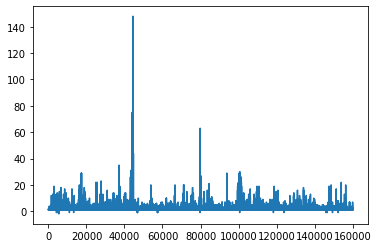

In [36]:
DataSetCovid19Germany.AnzahlFall.plot()

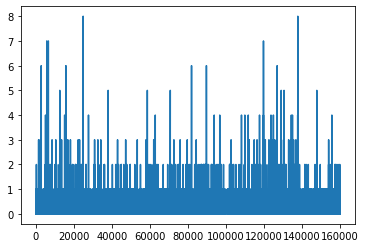

In [20]:
DataSetCovid19Germany.AnzahlTodesfall.plot()

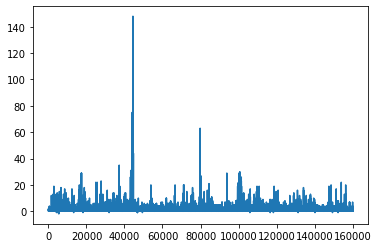

In [34]:
DataSetCovid19Germany.AnzahlGenesen.plot()

In [51]:
TabelleAnzahlFälle = pd.pivot_table(DataSetCovid19Germany,index = 'Meldedatum',columns ='Bundesland',values = 'AnzahlFall')
TabelleAnzahlTodesfälle = pd.pivot_table(DataSetCovid19Germany,index = 'Meldedatum',columns ='Bundesland',values = 'AnzahlTodesfall')
TabelleAnzahlGesunder = pd.pivot_table(DataSetCovid19Germany,index = 'Meldedatum',columns ='Bundesland',values = 'AnzahlGenesen')


In [52]:
TabelleAnzahlFälle

Bundesland,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
Meldedatum,,,,,,,,,,,,,,,,
2020/01/28 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/01/29 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/01/31 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/02/03 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/02/04 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/07/06 00:00:00,1.129032,1.185714,1.100000,1.0,NaN,1.0,1.125000,NaN,1.190476,1.081081,1.000000,NaN,1.0,1.0,NaN,1.0
2020/07/07 00:00:00,1.000000,1.378788,1.028571,1.0,1.0,1.0,1.115385,NaN,1.083333,1.366972,1.000000,1.0,1.0,1.0,1.0,1.0
2020/07/08 00:00:00,1.073171,1.122807,1.333333,NaN,1.0,1.0,1.181818,NaN,0.894737,1.226667,1.000000,1.0,1.0,1.0,1.0,1.0


In [53]:
TabelleAnzahlTodesfälle

Bundesland,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
Meldedatum,,,,,,,,,,,,,,,,
2020/01/28 00:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/01/29 00:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/01/31 00:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/02/03 00:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/02/04 00:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/07/06 00:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.000000,0.013514,0.0,NaN,0.0,0.0,NaN,0.0
2020/07/07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0.009174,0.0,0.0,0.0,0.0,0.000000,0.0
2020/07/08 00:00:00,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.052632,0.006667,0.0,0.0,0.0,0.0,0.142857,0.0


In [54]:
TabelleAnzahlGesunder

Bundesland,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
Meldedatum,,,,,,,,,,,,,,,,
2020/01/28 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/01/29 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/01/31 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/02/03 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/02/04 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/07/06 00:00:00,0.0,0.057143,0.166667,0.2,NaN,0.0,0.041667,NaN,0.142857,0.067568,0.000000,NaN,0.0,0.0,NaN,0.2
2020/07/07 00:00:00,0.0,0.015152,0.114286,0.0,0.00,0.0,0.000000,NaN,0.000000,0.082569,0.142857,0.0,0.0,0.0,0.000000,0.0
2020/07/08 00:00:00,0.0,0.035088,0.030303,NaN,0.00,0.0,0.000000,NaN,0.000000,0.046667,0.000000,0.0,0.0,0.0,0.285714,0.0


In [63]:
df = pd.DataFrame(DataSetHamburg,columns=DataSetHamburg.Altersgruppe)

In [72]:
DataCols = ['Meldedatum']
DataSetCovid19Germany.head(3)




,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,17307479,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,1001,"11.07.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
1,17307480,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"11.07.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2,17307481,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"11.07.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt


In [75]:
data_col=[]
for col in DataSetCovid19Germany.columns:
    data_col.append(col)
    
data_col    

['FID',
 'IdBundesland',
 'Bundesland',
 'Landkreis',
 'Altersgruppe',
 'Geschlecht',
 'AnzahlFall',
 'AnzahlTodesfall',
 'Meldedatum',
 'IdLandkreis',
 'Datenstand',
 'NeuerFall',
 'NeuerTodesfall',
 'Refdatum',
 'NeuGenesen',
 'AnzahlGenesen',
 'IstErkrankungsbeginn',
 'Altersgruppe2']

In [77]:
DataSetCovid19Germany.sample(5).isna()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
22804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69419,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
92785,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
71478,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13340,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [108]:
ndf = DataSetCovid19Germany.drop(columns=['FID','IdBundesland','Landkreis','Altersgruppe','Geschlecht','IdLandkreis','Datenstand','NeuerFall','NeuerTodesfall','Refdatum','NeuGenesen','IstErkrankungsbeginn','Altersgruppe2'])

In [116]:
zTmp = ndf["Bundesland"] == 'Hamburg'
Hamburg = ndf.loc[zTmp]

In [118]:
Hamburg.Meldedatum[0:118:30]


2888    2020/03/10 00:00:00
2918    2020/07/06 00:00:00
2948    2020/03/16 00:00:00
2978    2020/03/29 00:00:00
Name: Meldedatum, dtype: object

In [112]:
Hamburg.keys()

Index(['Bundesland', 'AnzahlFall', 'AnzahlTodesfall', 'Meldedatum',
       'AnzahlGenesen'],
      dtype='object')

In [156]:
INF =[]
TOD =[]
GESUND =[]

i=0
for j in Hamburg["AnzahlFall"]: 
    i= i + j 
    
    INF.append(i)
i=0
for j in Hamburg["AnzahlTodesfall"]:
    i = i +j
    TOD.append(i)
    
i = 0
for j in Hamburg["AnzahlGenesen"]:
    i = i +j 
    GESUND.append(i)



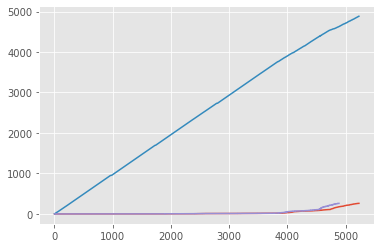

In [170]:
plt.style.use('ggplot')
plt.plot(INF,TOD)
plt.plot(INF,GESUND)
plt.plot(GESUND,TOD)
 


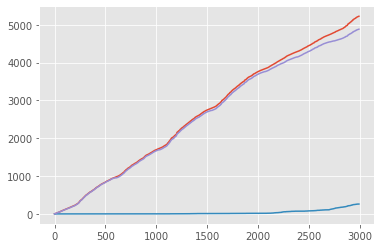

In [159]:
plt.plot(INF)
plt.plot(TOD)
plt.plot(GESUND)

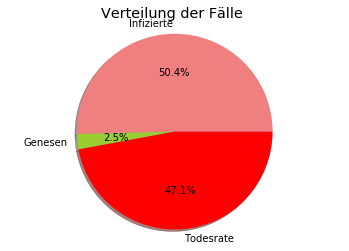

In [227]:
inf = sum(Hamburg["AnzahlFall"])
gen = sum(Hamburg["AnzahlTodesfall"])
tod = sum(Hamburg["AnzahlGenesen"])

labels = ['Infizierte', 'Genesen', 'Todesrate']
sizes = [inf, gen, tod]
colors = ['lightcoral', 'yellowgreen', 'red']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Verteilung der Fälle ")
plt.axis('equal')

plt.show()

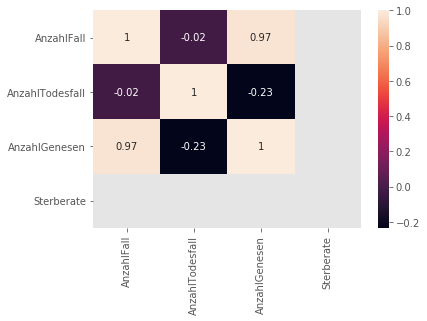

In [190]:
sns.heatmap(Hamburg.corr(),annot=True)

In [191]:
Hamburg.head()

,Bundesland,AnzahlFall,AnzahlTodesfall,Meldedatum,AnzahlGenesen,Sterberate
2888,Hamburg,1,0,2020/03/10 00:00:00,1,1
2889,Hamburg,1,0,2020/03/15 00:00:00,1,1
2890,Hamburg,1,0,2020/03/17 00:00:00,1,1
2891,Hamburg,1,0,2020/03/18 00:00:00,1,1
2892,Hamburg,1,0,2020/03/20 00:00:00,1,1


In [222]:
INFarray = np.array(INF)
TODarray = np.array(TOD)
GESUNDarray = np.array(GESUND)

GESAMTarray = INFarray,TODarray,GESUNDarray

Vorgabe = pd.DataFrame(GESAMTarray)
Vorgabe
Vorgabe.keys()
X = Hamburg.AnzahlFall, Hamburg.AnzahlTodesfall
y = Hamburg.AnzahlGenesen
#X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)

# At this point, the main project is converted again with a smaller data set.


In [223]:
data = pd.read_excel("HamburgCleanShort.xlsx")

In [224]:
data

,Datum,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,SummeGesmatInfziert,SummeGesamtTode,GesmatzahlGenesen,Sterberate,Genesungsrate
0,Feb,2,0,2,2,0,2,0.000000,1.000000
1,Mrz,2422,5,2378,2424,5,2380,484.800000,0.981848
2,Apr,2267,102,2132,4691,107,4512,43.841121,0.961842
3,Mai,225,77,142,4916,184,4654,26.717391,0.946705
4,Jun,269,71,198,5185,255,4852,20.333333,0.935776
5,Jul,41,6,32,5226,261,4884,20.022989,0.934558


In [225]:
data.head()


,Datum,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,SummeGesmatInfziert,SummeGesamtTode,GesmatzahlGenesen,Sterberate,Genesungsrate
0,Feb,2,0,2,2,0,2,0.000000,1.000000
1,Mrz,2422,5,2378,2424,5,2380,484.800000,0.981848
2,Apr,2267,102,2132,4691,107,4512,43.841121,0.961842
3,Mai,225,77,142,4916,184,4654,26.717391,0.946705
4,Jun,269,71,198,5185,255,4852,20.333333,0.935776


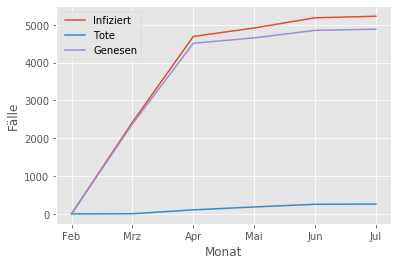

In [228]:
plt.style.use('ggplot')
plt.plot(data.Datum,data.SummeGesmatInfziert,label="Infiziert")
plt.plot(data.Datum,data.SummeGesamtTode, label="Tote")
plt.plot(data.Datum,data.GesmatzahlGenesen, label="Genesen")

plt.xlabel("Monat")
plt.ylabel("Fälle")

plt.legend()
plt.show()

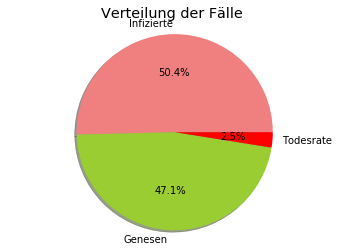

In [230]:
inf = sum(data.AnzahlFall)
gen = sum(data.AnzahlGenesen)
tod = sum(data.AnzahlTodesfall)

labels = ['Infizierte', 'Genesen', 'Todesrate']
sizes = [inf, gen, tod]
colors = ['lightcoral', 'yellowgreen', 'red']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Verteilung der Fälle ")
plt.axis('equal')

plt.show()

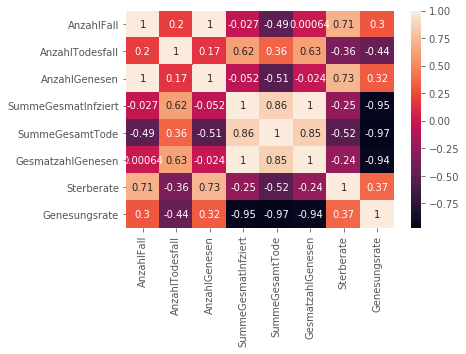

In [232]:
sns.heatmap(data.corr(),annot=True)

In [234]:
df_Hamburg = data


In [236]:
df_Hamburg.keys()

Index(['Datum', 'AnzahlFall', 'AnzahlTodesfall', 'AnzahlGenesen',
       'SummeGesmatInfziert', 'SummeGesamtTode', 'GesmatzahlGenesen',
       'Sterberate', 'Genesungsrate'],
      dtype='object')

In [239]:
df_Hamburg.shape



(6, 9)

In [241]:
dataFrame=pd.DataFrame(df_Hamburg)

In [243]:
dataFrame

,Datum,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,SummeGesmatInfziert,SummeGesamtTode,GesmatzahlGenesen,Sterberate,Genesungsrate
0,Feb,2,0,2,2,0,2,0.000000,1.000000
1,Mrz,2422,5,2378,2424,5,2380,484.800000,0.981848
2,Apr,2267,102,2132,4691,107,4512,43.841121,0.961842
3,Mai,225,77,142,4916,184,4654,26.717391,0.946705
4,Jun,269,71,198,5185,255,4852,20.333333,0.935776
5,Jul,41,6,32,5226,261,4884,20.022989,0.934558


In [256]:
X = np.array(df_Hamburg.AnzahlFall).reshape((-1,1))
X

array([[   2],
       [2422],
       [2267],
       [ 225],
       [ 269],
       [  41]], dtype=int64)

In [253]:
y=np.array(df_Hamburg.AnzahlTodesfall)
y

array([  0,   5, 102,  77,  71,   6], dtype=int64)

In [261]:
#X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [263]:
B_Maß = model.score(X,y)
print('Bestimmungmaß',B_Maß )

Bestimmungmaß 0.04185129486086736


In [266]:
print('Abfangsrate', model.intercept_)
print('Steigung', model.coef_)

Abfangsrate 36.524397714997335
Steigung [0.00800873]


In [269]:
new_model = LinearRegression().fit(X,y.reshape((-1,1)))
print('Abfangsrate', new_model.intercept_)
print('Steigung', new_model.coef_)


Abfangsrate [36.52439771]
Steigung [[0.00800873]]


In [271]:
y_pred = model.predict(X)

In [272]:
print('Vorhersage:', y_pred, sep ='\n')

Vorhersage:
[36.54041517 55.92153748 54.6801846  38.32636157 38.67874561 36.85275557]


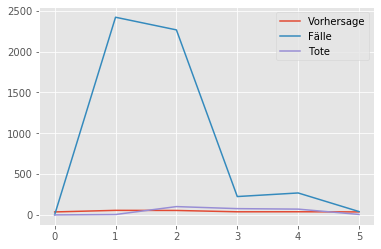

In [278]:
prdf = pd.DataFrame(y_pred,columns=['VorhersageAnzahlTote'])
Xdf = pd.DataFrame(X,columns=['AnzahlFälle'])
ydf =pd.DataFrame(y,columns=['AanzahlTote'])
plt.plot(prdf, label='Vorhersage')
plt.plot(Xdf, label='Fälle')
plt.plot(ydf, label='Tote')
plt.legend()
plt.show()